<a href="https://colab.research.google.com/github/Francesfahey/Applied-Predictive-analytics-/blob/ASSIGNMENT/KNN_optimised_on_each.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import google drive and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Year 4/Applied Predictive Analytics/Wind prediction CA")
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Year 4/Applied Predictive Analytics/Wind prediction CA


# loc 2

In [ ]:
import csv

datarows_loc2 = []
with open('Updated_loc2.csv', newline='') as csvfile:
    data_loc2 = csv.reader(csvfile, delimiter=',')
    # Load all content into rows
    rows = [row for row in data_loc2]



import pandas as pd

df_loc2= pd.read_csv("Updated_loc2.csv")

print(df_loc2)


       Location_ID        Date                 Time  Day  Month  Year  Hour  \
0                2  2017-01-02  2017-01-02 00:00:00    2      1  2017     0   
1                2  2017-01-02  2017-01-02 01:00:00    2      1  2017     1   
2                2  2017-01-02  2017-01-02 02:00:00    2      1  2017     2   
3                2  2017-01-02  2017-01-02 03:00:00    2      1  2017     3   
4                2  2017-01-02  2017-01-02 04:00:00    2      1  2017     4   
...            ...         ...                  ...  ...    ...   ...   ...   
43795            2  2021-12-31  2021-12-31 19:00:00   31     12  2021    19   
43796            2  2021-12-31  2021-12-31 20:00:00   31     12  2021    20   
43797            2  2021-12-31  2021-12-31 21:00:00   31     12  2021    21   
43798            2  2021-12-31  2021-12-31 22:00:00   31     12  2021    22   
43799            2  2021-12-31  2021-12-31 23:00:00   31     12  2021    23   

        Power  temperature_2m  relativehumidity_2m 

#KNN loc 2

KNN Regression Model Evaluation:
Mean Squared Error (MSE): 0.007480042903013699
Mean Absolute Error (MAE): 0.05671814155251142
R-squared (R²): 0.8325449348898141


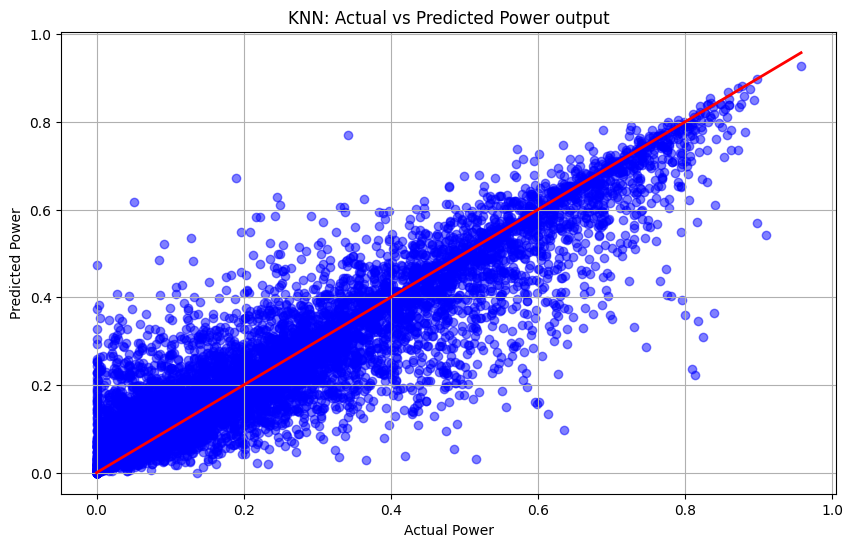

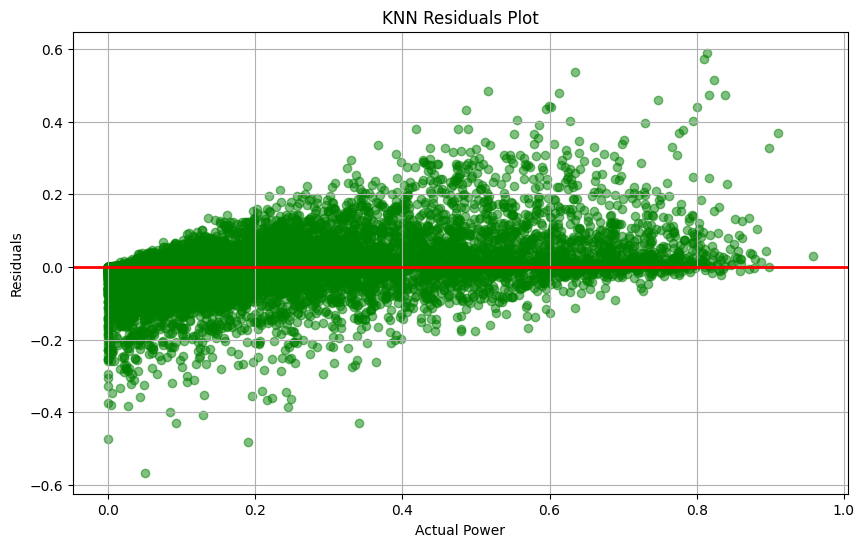

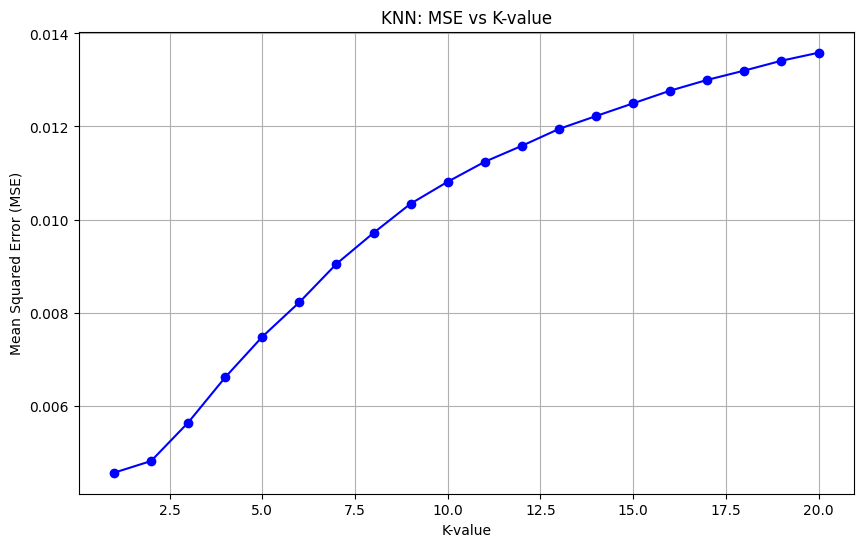

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Define the features and target variable
features = df_loc2[['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
                    'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
                    'winddirection_100m', 'windgusts_10m', 'Day', 'Month',
                    'Year', 'Hour']]
target = df_loc2['Power']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# ---- Preprocessing: Standardize the features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski', p=2)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"KNN Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# --- 1. Visualize Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("KNN: Actual vs Predicted Power output")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()

# --- 2. Residuals Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.title("KNN Residuals Plot")
plt.xlabel("Actual Power")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


k_range = range(1, 21)
mse_values = []

for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='minkowski', p=2)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_k = knn_model.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred_k))

plt.figure(figsize=(10, 6))
plt.plot(k_range, mse_values, marker='o', color='blue')
plt.title("KNN: MSE vs K-value")
plt.xlabel("K-value")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


Optimal K: 2

Optimized KNN Regression Model Evaluation:
Optimal K: 2
Mean Squared Error (MSE): 0.0048
Mean Absolute Error (MAE): 0.0342
R-squared (R²): 0.8924


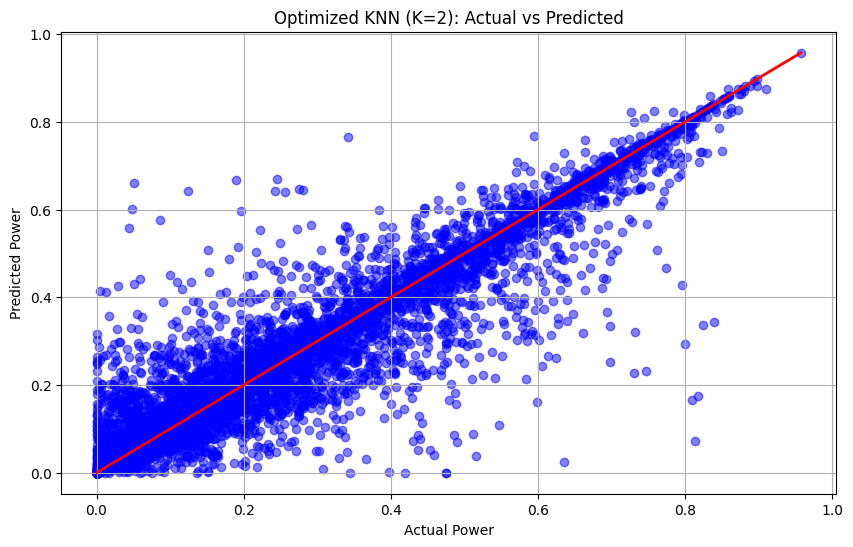

In [ ]:


k_range = range(1, 21)
mse_values = []

for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='minkowski', p=2)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_k = knn_model.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred_k))


print(f"Optimal K: 2")

# Retrain the KNN model with the optimal k
optimized_knn = KNeighborsRegressor(n_neighbors=2, weights='uniform', metric='minkowski', p=2)
optimized_knn.fit(X_train_scaled, y_train)

# Make predictions with the optimized KNN
y_pred_optimized = optimized_knn.predict(X_test_scaled)

# Evaluate the optimized KNN model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Print the evaluation results
print("\nOptimized KNN Regression Model Evaluation:")
print(f"Optimal K: 2")
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")
print(f"Mean Absolute Error (MAE): {mae_optimized:.4f}")
print(f"R-squared (R²): {r2_optimized:.4f}")

# Visualize the actual vs predicted for the optimized model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title(f"Optimized KNN (K=2): Actual vs Predicted")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()







#loc 3

In [ ]:
import csv

datarows_loc3= []
with open('Updated_loc3.csv', newline='') as csvfile:
    data_loc3= csv.reader(csvfile, delimiter=',')
    # Load all content into rows
    rows = [row for row in data_loc3]



import pandas as pd

df_loc3= pd.read_csv("Updated_loc3.csv")

print(df_loc3)


       Location_ID        Date                 Time  Day  Month  Year  Hour  \
0                3  2017-01-02  2017-01-02 00:00:00    2      1  2017     0   
1                3  2017-01-02  2017-01-02 01:00:00    2      1  2017     1   
2                3  2017-01-02  2017-01-02 02:00:00    2      1  2017     2   
3                3  2017-01-02  2017-01-02 03:00:00    2      1  2017     3   
4                3  2017-01-02  2017-01-02 04:00:00    2      1  2017     4   
...            ...         ...                  ...  ...    ...   ...   ...   
43795            3  2021-12-31  2021-12-31 19:00:00   31     12  2021    19   
43796            3  2021-12-31  2021-12-31 20:00:00   31     12  2021    20   
43797            3  2021-12-31  2021-12-31 21:00:00   31     12  2021    21   
43798            3  2021-12-31  2021-12-31 22:00:00   31     12  2021    22   
43799            3  2021-12-31  2021-12-31 23:00:00   31     12  2021    23   

        Power  temperature_2m  relativehumidity_2m 

knn loc 3

KNN Regression Model Evaluation:
Mean Squared Error (MSE): 0.013154108171826485
Mean Absolute Error (MAE): 0.073918299086758
R-squared (R²): 0.8140860079764528


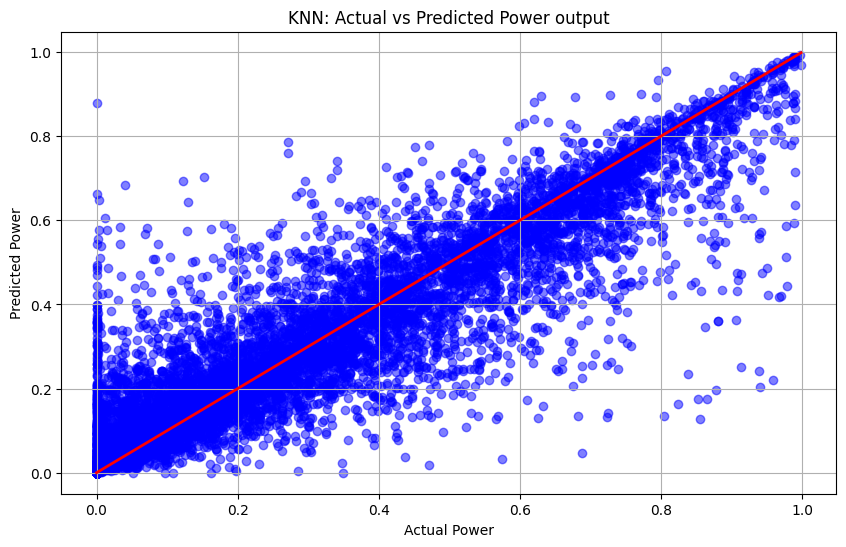

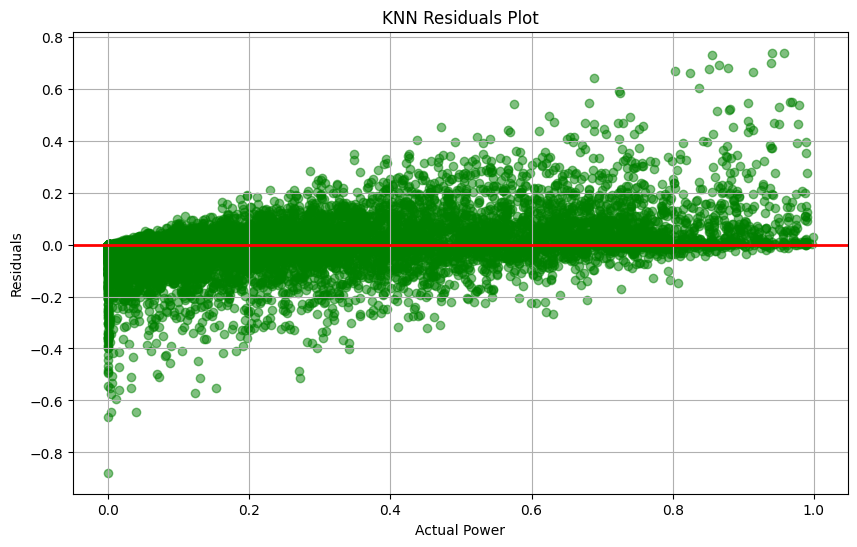

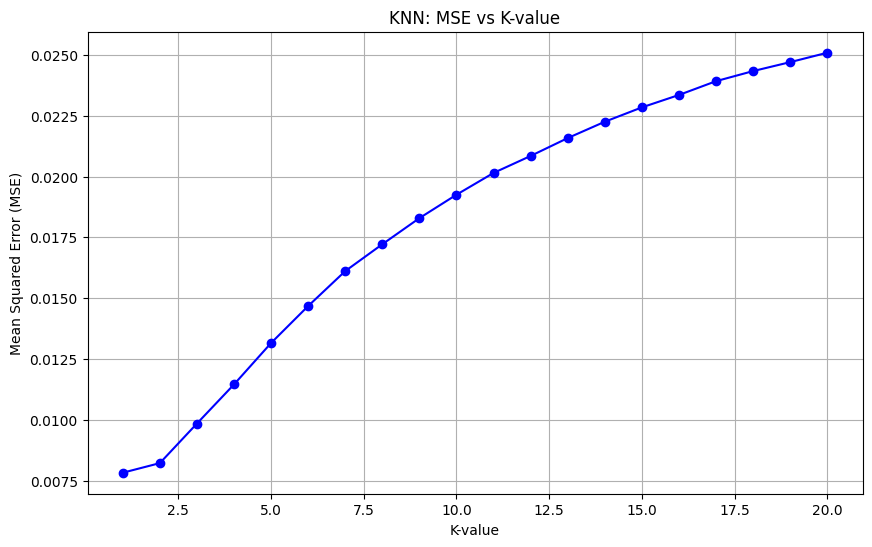

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Define the features and target variable
features = df_loc3[['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
                    'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
                    'winddirection_100m', 'windgusts_10m', 'Day', 'Month',
                    'Year', 'Hour']]
target = df_loc3['Power']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# ---- Preprocessing: Standardize the features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski', p=2)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"KNN Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# --- 1. Visualize Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("KNN: Actual vs Predicted Power output")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()

# --- 2. Residuals Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.title("KNN Residuals Plot")
plt.xlabel("Actual Power")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


k_range = range(1, 21)
mse_values = []

for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='minkowski', p=2)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_k = knn_model.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred_k))

plt.figure(figsize=(10, 6))
plt.plot(k_range, mse_values, marker='o', color='blue')
plt.title("KNN: MSE vs K-value")
plt.xlabel("K-value")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


Optimal K: 2

Optimized KNN Regression Model Evaluation:
Optimal K: 2
Mean Squared Error (MSE): 0.0082
Mean Absolute Error (MAE): 0.0440
R-squared (R²): 0.8839


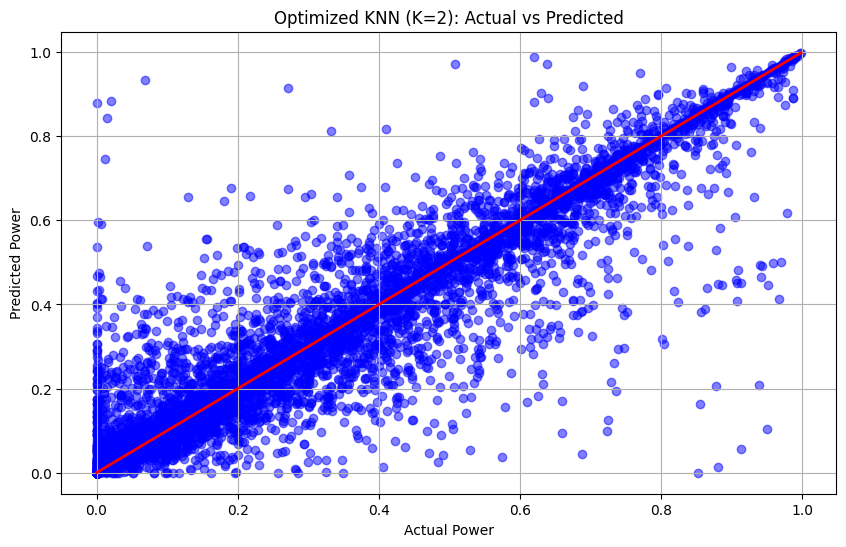

In [ ]:


k_range = range(1, 21)
mse_values = []

for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='minkowski', p=2)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_k = knn_model.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred_k))


print(f"Optimal K: 2")

# Retrain the KNN model with the optimal k
optimized_knn = KNeighborsRegressor(n_neighbors=2, weights='uniform', metric='minkowski', p=2)
optimized_knn.fit(X_train_scaled, y_train)

# Make predictions with the optimized KNN
y_pred_optimized = optimized_knn.predict(X_test_scaled)

# Evaluate the optimized KNN model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Print the evaluation results
print("\nOptimized KNN Regression Model Evaluation:")
print(f"Optimal K: 2")
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")
print(f"Mean Absolute Error (MAE): {mae_optimized:.4f}")
print(f"R-squared (R²): {r2_optimized:.4f}")

# Visualize the actual vs predicted for the optimized model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title(f"Optimized KNN (K=2): Actual vs Predicted")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()







LOC 4

In [ ]:
import csv

datarows_loc4= []
with open('Updated_loc4.csv', newline='') as csvfile:
    data_loc4= csv.reader(csvfile, delimiter=',')
    # Load all content into rows
    rows = [row for row in data_loc4]



import pandas as pd

df_loc4= pd.read_csv("Updated_loc4.csv")

print(df_loc4)


       Location_ID        Date                 Time  Day  Month  Year  Hour  \
0                4  2017-01-02  2017-01-02 00:00:00    2      1  2017     0   
1                4  2017-01-02  2017-01-02 01:00:00    2      1  2017     1   
2                4  2017-01-02  2017-01-02 02:00:00    2      1  2017     2   
3                4  2017-01-02  2017-01-02 03:00:00    2      1  2017     3   
4                4  2017-01-02  2017-01-02 04:00:00    2      1  2017     4   
...            ...         ...                  ...  ...    ...   ...   ...   
43795            4  2021-12-31  2021-12-31 19:00:00   31     12  2021    19   
43796            4  2021-12-31  2021-12-31 20:00:00   31     12  2021    20   
43797            4  2021-12-31  2021-12-31 21:00:00   31     12  2021    21   
43798            4  2021-12-31  2021-12-31 22:00:00   31     12  2021    22   
43799            4  2021-12-31  2021-12-31 23:00:00   31     12  2021    23   

        Power  temperature_2m  relativehumidity_2m 

KNN Regression Model Evaluation:
Mean Squared Error (MSE): 0.0059881117827853885
Mean Absolute Error (MAE): 0.050699413242009134
R-squared (R²): 0.8856329374414139


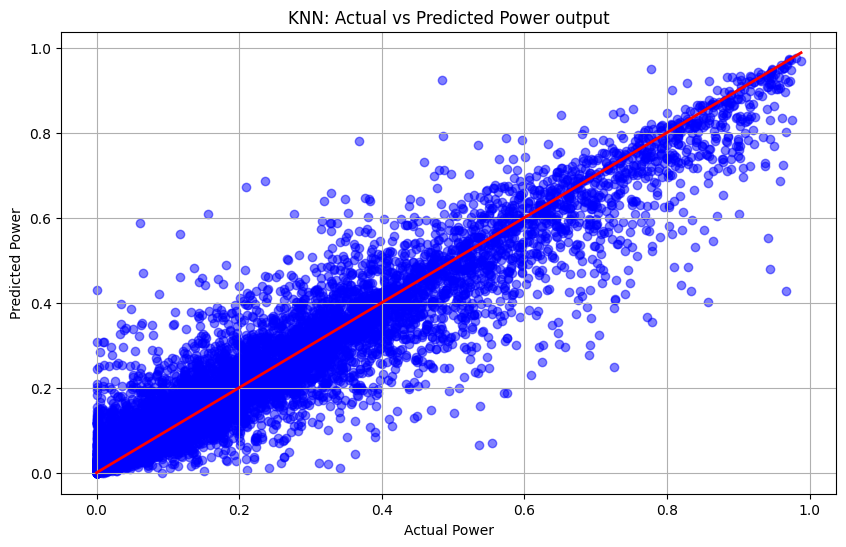

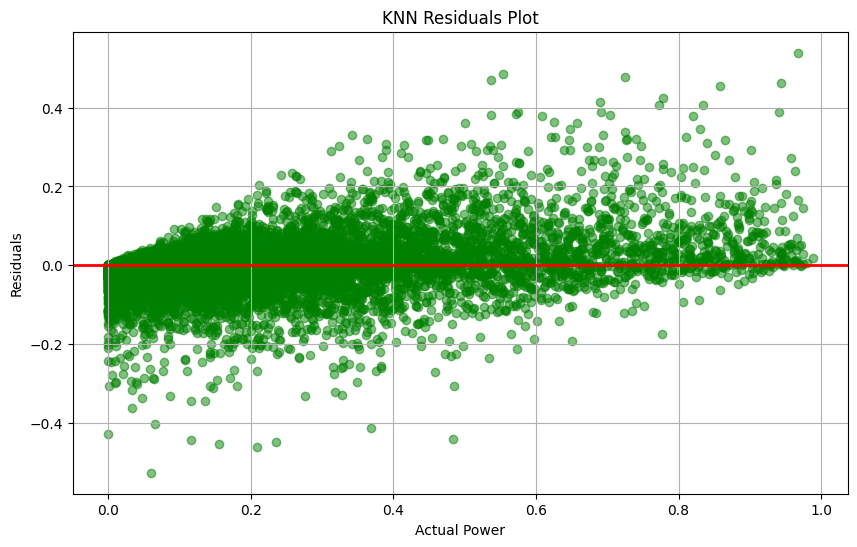

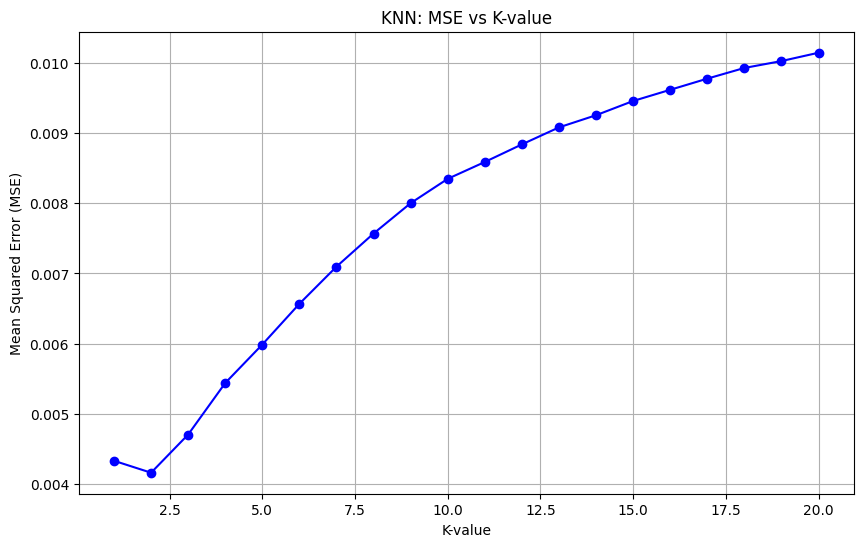

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Define the features and target variable
features = df_loc4[['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
                    'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
                    'winddirection_100m', 'windgusts_10m', 'Day', 'Month',
                    'Year', 'Hour']]
target = df_loc4['Power']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# ---- Preprocessing: Standardize the features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski', p=2)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"KNN Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# --- 1. Visualize Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("KNN: Actual vs Predicted Power output")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()

# --- 2. Residuals Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.title("KNN Residuals Plot")
plt.xlabel("Actual Power")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


k_range = range(1, 21)
mse_values = []

for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='minkowski', p=2)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_k = knn_model.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred_k))

plt.figure(figsize=(10, 6))
plt.plot(k_range, mse_values, marker='o', color='blue')
plt.title("KNN: MSE vs K-value")
plt.xlabel("K-value")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


Optimal K: 2

Optimized KNN Regression Model Evaluation:
Optimal K: 2
Mean Squared Error (MSE): 0.0042
Mean Absolute Error (MAE): 0.0333
R-squared (R²): 0.9205


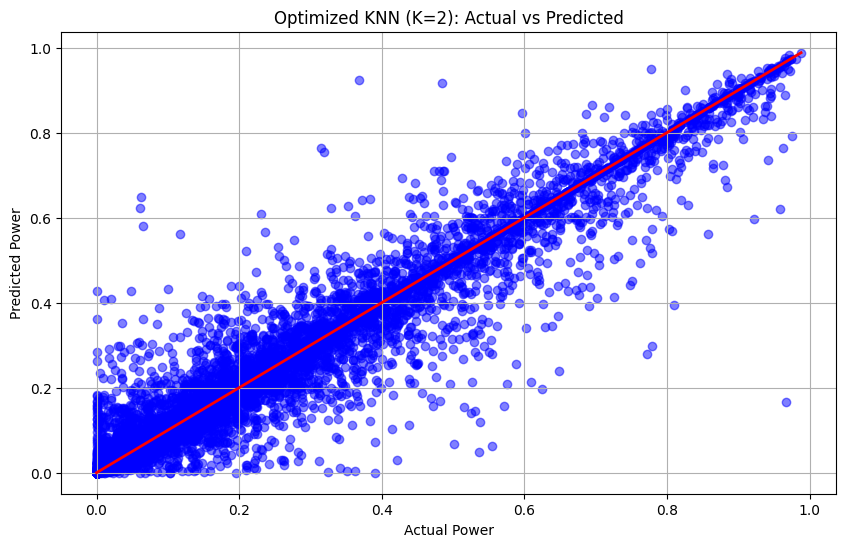

In [ ]:


k_range = range(1, 21)
mse_values = []

for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='minkowski', p=2)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_k = knn_model.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred_k))


print(f"Optimal K: 2")

# Retrain the KNN model with the optimal k
optimized_knn = KNeighborsRegressor(n_neighbors=2, weights='uniform', metric='minkowski', p=2)
optimized_knn.fit(X_train_scaled, y_train)

# Make predictions with the optimized KNN
y_pred_optimized = optimized_knn.predict(X_test_scaled)

# Evaluate the optimized KNN model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Print the evaluation results
print("\nOptimized KNN Regression Model Evaluation:")
print(f"Optimal K: 2")
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")
print(f"Mean Absolute Error (MAE): {mae_optimized:.4f}")
print(f"R-squared (R²): {r2_optimized:.4f}")

# Visualize the actual vs predicted for the optimized model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title(f"Optimized KNN (K=2): Actual vs Predicted")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()





